<a href="https://colab.research.google.com/github/puneetsingla17/Reinforcement-Learning-Pytorch/blob/master/RL_crossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import joblib
import tqdm
import gym
import matplotlib.pyplot as plt

In [2]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [3]:
# installing atari roms 
!wget http://www.atarimania.com/roms/Roms.rar
!mkdir /content/ROM/
!unrar e /content/Roms.rar /content/ROM/
!python -m atari_py.import_roms /content/ROM/y

--2021-11-06 16:17:56--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  10.61M  4.68MB/s    in 2.3s    

2021-11-06 16:17:58 (4.68 MB/s) - ‘Roms.rar’ saved [11128004/11128004]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/HC ROMS.zip                                      36%  OK 
Extracting  /content/ROM/ROMS.zip                                         74% 99%  OK 
All OK


In [ ]:
import gym
from colabgymrender.recorder import Recorder

ModuleNotFoundError: ignored

In [ ]:
name="CartPole-v0"
env=gym.make(name)
env.reset()

array([-0.03426394, -0.03897858, -0.01595489,  0.0232491 ])

In [ ]:
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [4]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

In [5]:
!apt-get install python-opengl -y
!pip install pyvirtualdisplay 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [6]:
import gym
import os
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from collections import namedtuple
import random
import torch.optim as op
display = Display(visible=0, size=(1400, 900))
display.start()
#os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

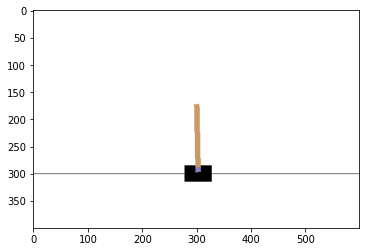

In [7]:
env = gym.make("CartPole-v1")
env.reset()
plt.imshow(env.render('rgb_array'))
plt.grid(False)

In [8]:
episode=namedtuple("episode",field_names=['reward','steps'])
episodestep=namedtuple("episodestep",field_names=['observation','action'])

In [19]:
class cartnet(nn.Module):
  def __init__(self,obsshape,hiddenlist,actshape):
    super().__init__()
    self.fc1=nn.Linear(obsshape,hiddenlist[0])
    self.fc2=nn.Linear(hiddenlist[0],hiddenlist[1])
    self.fc3=nn.Linear(hiddenlist[1],actshape)
  
  def forward(self,x):
    out=f.relu(self.fc1(x))
    out=f.relu(self.fc2(out))
    return self.fc3(out)

In [20]:
obs_dim=env.observation_space.shape[0]
nact=env.action_space.n

In [21]:
model1=cartnet(obs_dim,[64,64],nact)

In [22]:
def iteratebatch(env,net,batchsize):
  batch=[]
  episoderew=0
  episodesteps=[]
  obs=env.reset()
  while True:
    obstens=torch.FloatTensor(obs)
    act=f.softmax(model1.forward(obstens))
    actnp=np.random.choice(act.shape[0],p=act.detach().numpy())
    nextobs,rew,done,_ = env.step(actnp)
    episoderew+=rew
    step=episodestep(observation=obs,action=actnp)
    episodesteps.append(step)

    if done:
      e=episode(reward=episoderew,steps=episodesteps)
      batch.append(e)
      episoderew=0
      episodesteps=[]
      nextobs=env.reset()
      if len(batch)==batchsize:
        yield batch
        batch=[]
    
    obs=nextobs

In [23]:
def filterbatch(batch,percentile):
  rewardlist=list(map(lambda x:x.reward,batch))
  rew_bound=np.percentile(rewardlist,percentile)
  rew_mean=np.mean(rewardlist)
  trainobs=[]
  trainact=[]
  
  for r,s in batch:
    if r<rew_bound:
      continue
    
    trainobs.extend(map(lambda x:x.observation,s))
    trainact.extend(map(lambda x:x.action , s))

  trainobs_ts=torch.FloatTensor(trainobs)
  trainact_ts=torch.LongTensor(trainact)

  return trainact_ts , trainobs_ts,rew_mean,rew_bound

In [24]:
opt=op.Adam(model1.parameters(),lr=0.001)
loss=nn.CrossEntropyLoss()

In [25]:
gen=iteratebatch(env,model1,30)

In [ ]:
bc=next(gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [ ]:
a=filterbatch(bc,70)

In [26]:
numepochs=200

In [27]:
rewardlist=[]
for i in tqdm.tqdm(range(numepochs)):
  experience=next(gen)
  filteredexp=filterbatch(experience,70)
  opt.zero_grad()
  actvals=model1(filteredexp[1])
  lossv=loss(actvals,filteredexp[0])
  lossv.backward()
  opt.step()
  rewardlist.append(filteredexp[2])
  print("%d: iteration  loss=%.3f  rewardmean=%.1f "%(i,lossv.item(),filteredexp[2]))

  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
  1%|          | 2/200 [00:00<00:31,  6.24it/s]

0: iteration  loss=0.691  rewardmean=21.1 
1: iteration  loss=0.694  rewardmean=19.5 


  2%|▏         | 4/200 [00:00<00:31,  6.14it/s]

2: iteration  loss=0.691  rewardmean=24.7 
3: iteration  loss=0.695  rewardmean=19.6 


  3%|▎         | 6/200 [00:01<00:34,  5.66it/s]

4: iteration  loss=0.689  rewardmean=24.4 
5: iteration  loss=0.686  rewardmean=23.8 


  4%|▍         | 8/200 [00:01<00:34,  5.51it/s]

6: iteration  loss=0.688  rewardmean=23.1 
7: iteration  loss=0.686  rewardmean=23.7 


  4%|▍         | 9/200 [00:01<00:34,  5.52it/s]

8: iteration  loss=0.686  rewardmean=24.6 


  6%|▌         | 11/200 [00:01<00:36,  5.20it/s]

9: iteration  loss=0.686  rewardmean=25.9 
10: iteration  loss=0.682  rewardmean=23.7 


  6%|▌         | 12/200 [00:02<00:36,  5.09it/s]

11: iteration  loss=0.680  rewardmean=26.8 


  7%|▋         | 14/200 [00:02<00:37,  5.02it/s]

12: iteration  loss=0.680  rewardmean=25.8 
13: iteration  loss=0.677  rewardmean=25.8 


  8%|▊         | 15/200 [00:02<00:37,  4.91it/s]

14: iteration  loss=0.676  rewardmean=28.3 


  8%|▊         | 16/200 [00:03<00:38,  4.79it/s]

15: iteration  loss=0.679  rewardmean=28.5 


  8%|▊         | 17/200 [00:03<00:38,  4.73it/s]

16: iteration  loss=0.674  rewardmean=27.7 


  9%|▉         | 18/200 [00:03<00:39,  4.58it/s]

17: iteration  loss=0.678  rewardmean=29.6 


 10%|▉         | 19/200 [00:03<00:40,  4.43it/s]

18: iteration  loss=0.674  rewardmean=31.8 


 10%|█         | 20/200 [00:04<00:43,  4.12it/s]

19: iteration  loss=0.666  rewardmean=34.8 


 10%|█         | 21/200 [00:04<00:42,  4.23it/s]

20: iteration  loss=0.673  rewardmean=28.9 


 11%|█         | 22/200 [00:04<00:41,  4.29it/s]

21: iteration  loss=0.666  rewardmean=27.7 


 12%|█▏        | 23/200 [00:04<00:44,  3.98it/s]

22: iteration  loss=0.662  rewardmean=39.9 


 12%|█▏        | 24/200 [00:05<00:44,  3.94it/s]

23: iteration  loss=0.664  rewardmean=32.1 


 12%|█▎        | 25/200 [00:05<00:45,  3.85it/s]

24: iteration  loss=0.666  rewardmean=36.5 


 13%|█▎        | 26/200 [00:05<00:46,  3.75it/s]

25: iteration  loss=0.673  rewardmean=37.0 


 14%|█▎        | 27/200 [00:05<00:46,  3.75it/s]

26: iteration  loss=0.659  rewardmean=34.2 


 14%|█▍        | 28/200 [00:06<00:48,  3.55it/s]

27: iteration  loss=0.664  rewardmean=40.5 


 14%|█▍        | 29/200 [00:06<00:45,  3.73it/s]

28: iteration  loss=0.658  rewardmean=30.4 


 15%|█▌        | 30/200 [00:06<00:44,  3.85it/s]

29: iteration  loss=0.648  rewardmean=31.3 


 16%|█▌        | 31/200 [00:06<00:45,  3.73it/s]

30: iteration  loss=0.655  rewardmean=38.1 


 16%|█▌        | 32/200 [00:07<00:46,  3.63it/s]

31: iteration  loss=0.659  rewardmean=38.6 


 16%|█▋        | 33/200 [00:07<00:44,  3.75it/s]

32: iteration  loss=0.656  rewardmean=33.6 


 17%|█▋        | 34/200 [00:07<00:43,  3.83it/s]

33: iteration  loss=0.658  rewardmean=33.0 


 18%|█▊        | 35/200 [00:08<00:45,  3.65it/s]

34: iteration  loss=0.648  rewardmean=38.4 


 18%|█▊        | 36/200 [00:08<00:47,  3.42it/s]

35: iteration  loss=0.650  rewardmean=43.8 


 18%|█▊        | 37/200 [00:08<00:47,  3.45it/s]

36: iteration  loss=0.647  rewardmean=37.3 


 19%|█▉        | 38/200 [00:08<00:50,  3.22it/s]

37: iteration  loss=0.645  rewardmean=45.7 


 20%|█▉        | 39/200 [00:09<00:50,  3.21it/s]

38: iteration  loss=0.646  rewardmean=40.3 


 20%|██        | 40/200 [00:09<00:51,  3.09it/s]

39: iteration  loss=0.648  rewardmean=47.5 


 20%|██        | 41/200 [00:10<00:52,  3.02it/s]

40: iteration  loss=0.646  rewardmean=46.9 


 21%|██        | 42/200 [00:10<00:52,  2.99it/s]

41: iteration  loss=0.633  rewardmean=44.4 


 22%|██▏       | 43/200 [00:10<00:51,  3.03it/s]

42: iteration  loss=0.633  rewardmean=43.3 


 22%|██▏       | 44/200 [00:11<00:53,  2.90it/s]

43: iteration  loss=0.649  rewardmean=51.9 


 22%|██▎       | 45/200 [00:11<00:56,  2.73it/s]

44: iteration  loss=0.640  rewardmean=54.8 


 23%|██▎       | 46/200 [00:11<00:56,  2.75it/s]

45: iteration  loss=0.633  rewardmean=47.7 


 24%|██▎       | 47/200 [00:12<00:54,  2.80it/s]

46: iteration  loss=0.631  rewardmean=43.3 


 24%|██▍       | 48/200 [00:12<00:57,  2.64it/s]

47: iteration  loss=0.627  rewardmean=55.9 


 24%|██▍       | 49/200 [00:12<00:57,  2.61it/s]

48: iteration  loss=0.631  rewardmean=49.8 


 25%|██▌       | 50/200 [00:13<00:58,  2.57it/s]

49: iteration  loss=0.626  rewardmean=50.2 


 26%|██▌       | 51/200 [00:13<00:59,  2.51it/s]

50: iteration  loss=0.622  rewardmean=53.5 


 26%|██▌       | 52/200 [00:14<01:02,  2.37it/s]

51: iteration  loss=0.621  rewardmean=62.9 


 26%|██▋       | 53/200 [00:14<01:01,  2.40it/s]

52: iteration  loss=0.622  rewardmean=54.8 


 27%|██▋       | 54/200 [00:15<01:04,  2.25it/s]

53: iteration  loss=0.617  rewardmean=66.5 


 28%|██▊       | 55/200 [00:15<01:06,  2.19it/s]

54: iteration  loss=0.610  rewardmean=56.0 


 28%|██▊       | 56/200 [00:16<01:09,  2.08it/s]

55: iteration  loss=0.617  rewardmean=72.3 


 28%|██▊       | 57/200 [00:16<01:10,  2.02it/s]

56: iteration  loss=0.617  rewardmean=71.5 


 29%|██▉       | 58/200 [00:17<01:09,  2.03it/s]

57: iteration  loss=0.623  rewardmean=62.3 


 30%|██▉       | 59/200 [00:17<01:06,  2.11it/s]

58: iteration  loss=0.610  rewardmean=57.7 


 30%|███       | 60/200 [00:18<01:08,  2.05it/s]

59: iteration  loss=0.611  rewardmean=70.3 


 30%|███       | 61/200 [00:18<01:06,  2.08it/s]

60: iteration  loss=0.627  rewardmean=63.3 


 31%|███       | 62/200 [00:19<01:07,  2.04it/s]

61: iteration  loss=0.610  rewardmean=70.0 


 32%|███▏      | 63/200 [00:19<01:04,  2.11it/s]

62: iteration  loss=0.617  rewardmean=57.7 


 32%|███▏      | 64/200 [00:20<01:06,  2.04it/s]

63: iteration  loss=0.610  rewardmean=73.2 


 32%|███▎      | 65/200 [00:20<01:08,  1.98it/s]

64: iteration  loss=0.614  rewardmean=72.2 


 33%|███▎      | 66/200 [00:21<01:05,  2.04it/s]

65: iteration  loss=0.597  rewardmean=60.4 


 34%|███▎      | 67/200 [00:21<01:08,  1.94it/s]

66: iteration  loss=0.610  rewardmean=78.6 


 34%|███▍      | 68/200 [00:22<01:09,  1.90it/s]

67: iteration  loss=0.616  rewardmean=75.1 


 34%|███▍      | 69/200 [00:22<01:09,  1.88it/s]

68: iteration  loss=0.589  rewardmean=74.7 


 35%|███▌      | 70/200 [00:23<01:12,  1.78it/s]

69: iteration  loss=0.589  rewardmean=84.9 


 36%|███▌      | 71/200 [00:24<01:13,  1.75it/s]

70: iteration  loss=0.607  rewardmean=80.0 


 36%|███▌      | 72/200 [00:24<01:18,  1.63it/s]

71: iteration  loss=0.598  rewardmean=97.3 


 36%|███▋      | 73/200 [00:25<01:22,  1.54it/s]

72: iteration  loss=0.593  rewardmean=99.9 


 37%|███▋      | 74/200 [00:26<01:21,  1.54it/s]

73: iteration  loss=0.601  rewardmean=88.2 


 38%|███▊      | 75/200 [00:26<01:19,  1.58it/s]

74: iteration  loss=0.605  rewardmean=79.3 


 38%|███▊      | 76/200 [00:27<01:25,  1.46it/s]

75: iteration  loss=0.595  rewardmean=111.3 


 38%|███▊      | 77/200 [00:28<01:25,  1.44it/s]

76: iteration  loss=0.591  rewardmean=99.4 


 39%|███▉      | 78/200 [00:29<01:28,  1.37it/s]

77: iteration  loss=0.597  rewardmean=111.4 


 40%|███▉      | 79/200 [00:29<01:33,  1.29it/s]

78: iteration  loss=0.598  rewardmean=117.9 


 40%|████      | 80/200 [00:30<01:34,  1.27it/s]

79: iteration  loss=0.592  rewardmean=111.0 


 40%|████      | 81/200 [00:31<01:39,  1.19it/s]

80: iteration  loss=0.587  rewardmean=129.0 


 41%|████      | 82/200 [00:32<01:42,  1.15it/s]

81: iteration  loss=0.590  rewardmean=128.0 


 42%|████▏     | 83/200 [00:33<01:47,  1.09it/s]

82: iteration  loss=0.591  rewardmean=145.0 


 42%|████▏     | 84/200 [00:34<01:44,  1.11it/s]

83: iteration  loss=0.580  rewardmean=113.9 


 42%|████▎     | 85/200 [00:35<01:41,  1.14it/s]

84: iteration  loss=0.588  rewardmean=113.8 


 43%|████▎     | 86/200 [00:36<01:38,  1.16it/s]

85: iteration  loss=0.588  rewardmean=114.7 


 44%|████▎     | 87/200 [00:37<01:43,  1.09it/s]

86: iteration  loss=0.587  rewardmean=141.6 


 44%|████▍     | 88/200 [00:38<01:38,  1.14it/s]

87: iteration  loss=0.589  rewardmean=111.9 


 44%|████▍     | 89/200 [00:39<01:43,  1.07it/s]

88: iteration  loss=0.581  rewardmean=147.8 


 45%|████▌     | 90/200 [00:40<01:45,  1.05it/s]

89: iteration  loss=0.584  rewardmean=140.2 


 46%|████▌     | 91/200 [00:41<01:51,  1.03s/it]

90: iteration  loss=0.590  rewardmean=157.0 


 46%|████▌     | 92/200 [00:42<01:50,  1.02s/it]

91: iteration  loss=0.585  rewardmean=141.1 


 46%|████▋     | 93/200 [00:43<01:54,  1.07s/it]

92: iteration  loss=0.585  rewardmean=161.2 


 47%|████▋     | 94/200 [00:44<01:57,  1.11s/it]

93: iteration  loss=0.583  rewardmean=166.0 


 48%|████▊     | 95/200 [00:45<01:58,  1.13s/it]

94: iteration  loss=0.589  rewardmean=164.1 


 48%|████▊     | 96/200 [00:46<01:54,  1.10s/it]

95: iteration  loss=0.574  rewardmean=144.3 


 48%|████▊     | 97/200 [00:48<02:02,  1.19s/it]

96: iteration  loss=0.588  rewardmean=193.8 


 49%|████▉     | 98/200 [00:49<02:07,  1.25s/it]

97: iteration  loss=0.574  rewardmean=195.5 


 50%|████▉     | 99/200 [00:51<02:12,  1.31s/it]

98: iteration  loss=0.579  rewardmean=204.6 


 50%|█████     | 100/200 [00:52<02:13,  1.34s/it]

99: iteration  loss=0.573  rewardmean=193.4 


 50%|█████     | 101/200 [00:53<02:04,  1.26s/it]

100: iteration  loss=0.579  rewardmean=150.3 


 51%|█████     | 102/200 [00:55<02:09,  1.32s/it]

101: iteration  loss=0.571  rewardmean=204.9 


 52%|█████▏    | 103/200 [00:56<02:10,  1.34s/it]

102: iteration  loss=0.576  rewardmean=196.7 


 52%|█████▏    | 104/200 [00:58<02:15,  1.41s/it]

103: iteration  loss=0.575  rewardmean=219.5 


 52%|█████▎    | 105/200 [00:59<02:15,  1.43s/it]

104: iteration  loss=0.565  rewardmean=206.4 


 53%|█████▎    | 106/200 [01:01<02:21,  1.50s/it]

105: iteration  loss=0.571  rewardmean=230.4 


 54%|█████▎    | 107/200 [01:03<02:29,  1.60s/it]

106: iteration  loss=0.567  rewardmean=256.9 


 54%|█████▍    | 108/200 [01:04<02:33,  1.66s/it]

107: iteration  loss=0.568  rewardmean=239.4 


 55%|█████▍    | 109/200 [01:06<02:33,  1.69s/it]

108: iteration  loss=0.572  rewardmean=244.0 


 55%|█████▌    | 110/200 [01:08<02:33,  1.70s/it]

109: iteration  loss=0.567  rewardmean=237.8 


 56%|█████▌    | 111/200 [01:10<02:33,  1.73s/it]

110: iteration  loss=0.565  rewardmean=247.4 


 56%|█████▌    | 112/200 [01:12<02:39,  1.81s/it]

111: iteration  loss=0.571  rewardmean=280.2 


 56%|█████▋    | 113/200 [01:13<02:35,  1.79s/it]

112: iteration  loss=0.570  rewardmean=243.5 


 57%|█████▋    | 114/200 [01:15<02:33,  1.78s/it]

113: iteration  loss=0.567  rewardmean=248.3 


 57%|█████▊    | 115/200 [01:17<02:29,  1.76s/it]

114: iteration  loss=0.561  rewardmean=237.0 


 58%|█████▊    | 116/200 [01:19<02:32,  1.82s/it]

115: iteration  loss=0.561  rewardmean=274.4 


 58%|█████▊    | 117/200 [01:21<02:38,  1.91s/it]

116: iteration  loss=0.557  rewardmean=300.4 


 59%|█████▉    | 118/200 [01:23<02:41,  1.98s/it]

117: iteration  loss=0.564  rewardmean=296.6 


 60%|█████▉    | 119/200 [01:25<02:47,  2.07s/it]

118: iteration  loss=0.557  rewardmean=321.6 


 60%|██████    | 120/200 [01:27<02:47,  2.09s/it]

119: iteration  loss=0.560  rewardmean=292.3 


 60%|██████    | 121/200 [01:29<02:43,  2.07s/it]

120: iteration  loss=0.566  rewardmean=279.5 


 61%|██████    | 122/200 [01:32<02:44,  2.11s/it]

121: iteration  loss=0.559  rewardmean=309.4 


 62%|██████▏   | 123/200 [01:34<02:39,  2.07s/it]

122: iteration  loss=0.561  rewardmean=282.5 


 62%|██████▏   | 124/200 [01:36<02:42,  2.14s/it]

123: iteration  loss=0.560  rewardmean=323.1 


 62%|██████▎   | 125/200 [01:38<02:40,  2.14s/it]

124: iteration  loss=0.555  rewardmean=301.1 


 63%|██████▎   | 126/200 [01:40<02:42,  2.19s/it]

125: iteration  loss=0.558  rewardmean=324.7 


 64%|██████▎   | 127/200 [01:43<02:43,  2.24s/it]

126: iteration  loss=0.555  rewardmean=332.3 


 64%|██████▍   | 128/200 [01:45<02:37,  2.19s/it]

127: iteration  loss=0.560  rewardmean=286.5 


 64%|██████▍   | 129/200 [01:47<02:35,  2.19s/it]

128: iteration  loss=0.558  rewardmean=306.1 


 65%|██████▌   | 130/200 [01:49<02:30,  2.14s/it]

129: iteration  loss=0.555  rewardmean=287.8 


 66%|██████▌   | 131/200 [01:51<02:28,  2.15s/it]

130: iteration  loss=0.547  rewardmean=290.9 


 66%|██████▌   | 132/200 [01:53<02:27,  2.18s/it]

131: iteration  loss=0.552  rewardmean=313.1 


 66%|██████▋   | 133/200 [01:56<02:26,  2.19s/it]

132: iteration  loss=0.550  rewardmean=310.8 


 67%|██████▋   | 134/200 [01:58<02:26,  2.22s/it]

133: iteration  loss=0.552  rewardmean=320.8 


 68%|██████▊   | 135/200 [02:00<02:24,  2.22s/it]

134: iteration  loss=0.548  rewardmean=312.9 


 68%|██████▊   | 136/200 [02:03<02:26,  2.30s/it]

135: iteration  loss=0.550  rewardmean=339.4 


 68%|██████▊   | 137/200 [02:05<02:27,  2.33s/it]

136: iteration  loss=0.550  rewardmean=331.6 


 69%|██████▉   | 138/200 [02:07<02:25,  2.35s/it]

137: iteration  loss=0.545  rewardmean=334.0 


 70%|██████▉   | 139/200 [02:10<02:31,  2.49s/it]

138: iteration  loss=0.547  rewardmean=391.4 


 70%|███████   | 140/200 [02:13<02:30,  2.51s/it]

139: iteration  loss=0.543  rewardmean=338.2 


 70%|███████   | 141/200 [02:16<02:32,  2.58s/it]

140: iteration  loss=0.543  rewardmean=376.1 


 71%|███████   | 142/200 [02:18<02:30,  2.60s/it]

141: iteration  loss=0.543  rewardmean=367.3 


 72%|███████▏  | 143/200 [02:21<02:31,  2.67s/it]

142: iteration  loss=0.547  rewardmean=384.5 


 72%|███████▏  | 144/200 [02:24<02:32,  2.73s/it]

143: iteration  loss=0.541  rewardmean=389.0 


 72%|███████▎  | 145/200 [02:27<02:32,  2.77s/it]

144: iteration  loss=0.534  rewardmean=394.0 


 73%|███████▎  | 146/200 [02:29<02:27,  2.73s/it]

145: iteration  loss=0.544  rewardmean=364.5 


 74%|███████▎  | 147/200 [02:32<02:26,  2.76s/it]

146: iteration  loss=0.541  rewardmean=394.9 


 74%|███████▍  | 148/200 [02:35<02:25,  2.80s/it]

147: iteration  loss=0.544  rewardmean=397.6 


 74%|███████▍  | 149/200 [02:38<02:16,  2.68s/it]

148: iteration  loss=0.549  rewardmean=323.0 


 75%|███████▌  | 150/200 [02:40<02:17,  2.75s/it]

149: iteration  loss=0.541  rewardmean=405.5 


 76%|███████▌  | 151/200 [02:43<02:17,  2.80s/it]

150: iteration  loss=0.544  rewardmean=404.9 


 76%|███████▌  | 152/200 [02:46<02:15,  2.83s/it]

151: iteration  loss=0.544  rewardmean=401.9 


 76%|███████▋  | 153/200 [02:49<02:13,  2.84s/it]

152: iteration  loss=0.535  rewardmean=398.1 


 77%|███████▋  | 154/200 [02:52<02:09,  2.81s/it]

153: iteration  loss=0.539  rewardmean=385.3 


 78%|███████▊  | 155/200 [02:55<02:12,  2.95s/it]

154: iteration  loss=0.534  rewardmean=451.8 


 78%|███████▊  | 156/200 [02:59<02:15,  3.08s/it]

155: iteration  loss=0.537  rewardmean=461.2 


 78%|███████▊  | 157/200 [03:01<02:08,  2.99s/it]

156: iteration  loss=0.533  rewardmean=388.9 


 79%|███████▉  | 158/200 [03:04<02:04,  2.97s/it]

157: iteration  loss=0.536  rewardmean=405.7 


 80%|███████▉  | 159/200 [03:07<01:59,  2.91s/it]

158: iteration  loss=0.541  rewardmean=390.8 


 80%|████████  | 160/200 [03:10<01:55,  2.88s/it]

159: iteration  loss=0.540  rewardmean=388.3 


 80%|████████  | 161/200 [03:13<01:54,  2.94s/it]

160: iteration  loss=0.536  rewardmean=425.7 


 81%|████████  | 162/200 [03:16<01:53,  2.98s/it]

161: iteration  loss=0.530  rewardmean=429.6 


 82%|████████▏ | 163/200 [03:19<01:53,  3.06s/it]

162: iteration  loss=0.538  rewardmean=451.2 


 82%|████████▏ | 164/200 [03:23<01:53,  3.15s/it]

163: iteration  loss=0.535  rewardmean=445.7 


 82%|████████▎ | 165/200 [03:26<01:54,  3.26s/it]

164: iteration  loss=0.534  rewardmean=477.4 


 83%|████████▎ | 166/200 [03:29<01:48,  3.19s/it]

165: iteration  loss=0.531  rewardmean=417.8 


 84%|████████▎ | 167/200 [03:32<01:46,  3.22s/it]

166: iteration  loss=0.533  rewardmean=462.2 


 84%|████████▍ | 168/200 [03:35<01:41,  3.17s/it]

167: iteration  loss=0.532  rewardmean=415.3 


 84%|████████▍ | 169/200 [03:39<01:37,  3.16s/it]

168: iteration  loss=0.530  rewardmean=440.0 


 85%|████████▌ | 170/200 [03:42<01:36,  3.22s/it]

169: iteration  loss=0.526  rewardmean=460.3 


 86%|████████▌ | 171/200 [03:45<01:34,  3.25s/it]

170: iteration  loss=0.535  rewardmean=446.8 


 86%|████████▌ | 172/200 [03:48<01:30,  3.22s/it]

171: iteration  loss=0.529  rewardmean=437.5 


 86%|████████▋ | 173/200 [03:52<01:28,  3.28s/it]

172: iteration  loss=0.528  rewardmean=475.1 


 87%|████████▋ | 174/200 [03:55<01:26,  3.34s/it]

173: iteration  loss=0.526  rewardmean=467.6 


 88%|████████▊ | 175/200 [03:59<01:23,  3.32s/it]

174: iteration  loss=0.530  rewardmean=446.8 


 88%|████████▊ | 176/200 [04:02<01:19,  3.33s/it]

175: iteration  loss=0.523  rewardmean=450.9 


 88%|████████▊ | 177/200 [04:05<01:17,  3.38s/it]

176: iteration  loss=0.523  rewardmean=469.5 


 89%|████████▉ | 178/200 [04:09<01:14,  3.38s/it]

177: iteration  loss=0.525  rewardmean=451.3 


 90%|████████▉ | 179/200 [04:12<01:11,  3.39s/it]

178: iteration  loss=0.527  rewardmean=464.1 


 90%|█████████ | 180/200 [04:16<01:07,  3.39s/it]

179: iteration  loss=0.520  rewardmean=460.3 


 90%|█████████ | 181/200 [04:19<01:04,  3.40s/it]

180: iteration  loss=0.524  rewardmean=473.7 


 91%|█████████ | 182/200 [04:22<01:00,  3.37s/it]

181: iteration  loss=0.525  rewardmean=461.4 


 92%|█████████▏| 183/200 [04:26<00:57,  3.39s/it]

182: iteration  loss=0.525  rewardmean=474.2 


 92%|█████████▏| 184/200 [04:29<00:54,  3.40s/it]

183: iteration  loss=0.523  rewardmean=470.2 


 92%|█████████▎| 185/200 [04:33<00:52,  3.47s/it]

184: iteration  loss=0.519  rewardmean=482.4 


 93%|█████████▎| 186/200 [04:36<00:48,  3.44s/it]

185: iteration  loss=0.521  rewardmean=458.9 


 94%|█████████▎| 187/200 [04:40<00:45,  3.47s/it]

186: iteration  loss=0.531  rewardmean=491.9 


 94%|█████████▍| 188/200 [04:43<00:41,  3.42s/it]

187: iteration  loss=0.526  rewardmean=457.7 


 94%|█████████▍| 189/200 [04:47<00:37,  3.44s/it]

188: iteration  loss=0.517  rewardmean=484.5 


 95%|█████████▌| 190/200 [04:50<00:34,  3.49s/it]

189: iteration  loss=0.520  rewardmean=494.4 


 96%|█████████▌| 191/200 [04:54<00:31,  3.52s/it]

190: iteration  loss=0.519  rewardmean=479.9 


 96%|█████████▌| 192/200 [04:57<00:28,  3.54s/it]

191: iteration  loss=0.523  rewardmean=488.1 


 96%|█████████▋| 193/200 [05:01<00:24,  3.53s/it]

192: iteration  loss=0.518  rewardmean=488.4 


 97%|█████████▋| 194/200 [05:04<00:21,  3.50s/it]

193: iteration  loss=0.520  rewardmean=480.6 


 98%|█████████▊| 195/200 [05:08<00:17,  3.51s/it]

194: iteration  loss=0.517  rewardmean=481.3 


 98%|█████████▊| 196/200 [05:11<00:14,  3.50s/it]

195: iteration  loss=0.519  rewardmean=486.1 


 98%|█████████▊| 197/200 [05:15<00:10,  3.43s/it]

196: iteration  loss=0.519  rewardmean=452.9 


 99%|█████████▉| 198/200 [05:18<00:06,  3.46s/it]

197: iteration  loss=0.516  rewardmean=468.0 


100%|█████████▉| 199/200 [05:22<00:03,  3.44s/it]

198: iteration  loss=0.512  rewardmean=469.3 


100%|██████████| 200/200 [05:25<00:00,  1.63s/it]

199: iteration  loss=0.518  rewardmean=488.2 


In [33]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

import gym
from colabgymrender.recorder import Recorder
env = gym.make("CartPole-v1")
directory = './video'
env = Recorder(env, directory)


In [31]:
model1.eval()

cartnet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [34]:
observation = env.reset()
terminal = False
while not terminal:
  # obstens=torch.FloatTensor(observation)
  # action=model1.forward(obstens).argmax().item()
  action = env.action_space.sample()
  observation, reward, terminal, info = env.step(action)
  #observation, reward, terminal, info = env.step(action)

env.play()

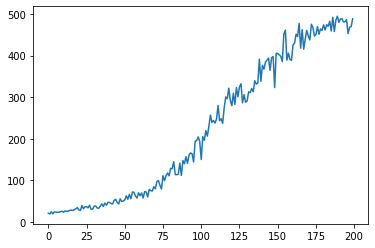

In [35]:
plt.plot(rewardlist)